
Dataset Description
The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November.

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
Ozone - COPERNICUS/S5P/NRTI/L3_O3
Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD
Important: Please only use the data provided for this challenge as part of your modeling effort. Do not use any external data, including any data from Sentinel-5P not provided on this page.

Files

train.csv - the training set
test.csv - the test set; your task is to predict the emission target for each week at each location
sample_submission.csv - a sample submission file in the correct format

# References
https://www.kaggle.com/competitions/playground-series-s3e20/overview 
https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense#What-the-lockdown-implies-for-cross-validation 


In [24]:

import pandas as pd

df_train = pd.read_csv('playground-series-s3e20/train.csv')
df_test = pd.read_csv('playground-series-s3e20/test.csv')

display(df_train.head())  
display(df_test.head())
print(df_train.shape, df_test.shape)
display(df_train.columns)
display(df_train.describe())


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


(79023, 76) (24353, 75)


Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


<Axes: >

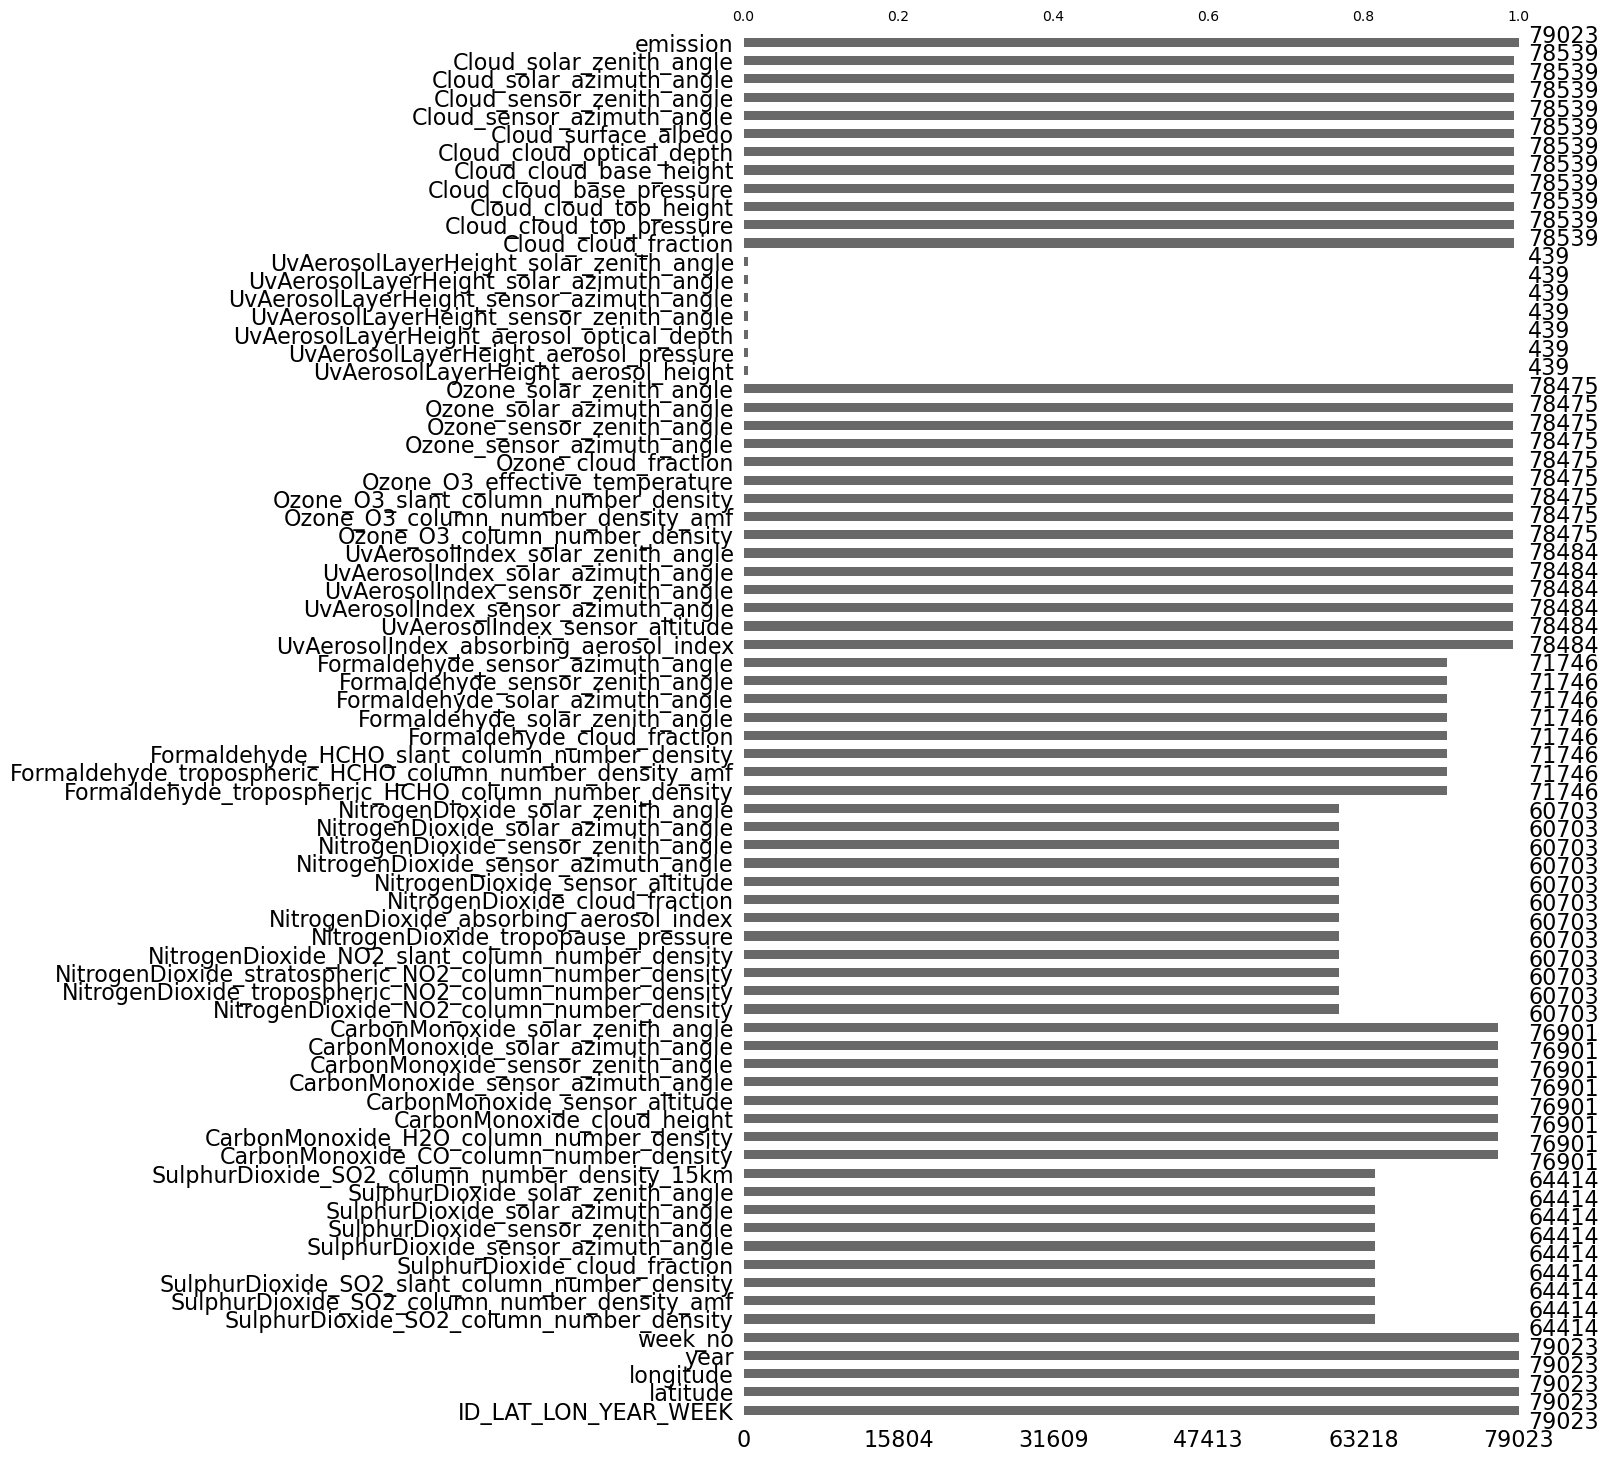

In [25]:
import missingno as msno

# msno.matrix(df_train, figsize=(10, 3))

msno.bar(df_train, figsize=(10, 18))


Cloud_cloud_fraction                         484
Cloud_cloud_top_pressure                     484
Cloud_cloud_top_height                       484
Cloud_cloud_base_pressure                    484
Cloud_cloud_base_height                      484
Cloud_cloud_optical_depth                    484
Cloud_surface_albedo                         484
Cloud_sensor_azimuth_angle                   484
Cloud_sensor_zenith_angle                    484
Cloud_solar_azimuth_angle                    484
Cloud_solar_zenith_angle                     484
Ozone_O3_column_number_density               548
Ozone_O3_column_number_density_amf           548
Ozone_O3_slant_column_number_density         548
Ozone_O3_effective_temperature               548
Ozone_cloud_fraction                         548
Ozone_sensor_azimuth_angle                   548
Ozone_sensor_zenith_angle                    548
Ozone_solar_azimuth_angle                    548
Ozone_solar_zenith_angle                     548
CarbonMonoxide_CO_co

<Axes: >

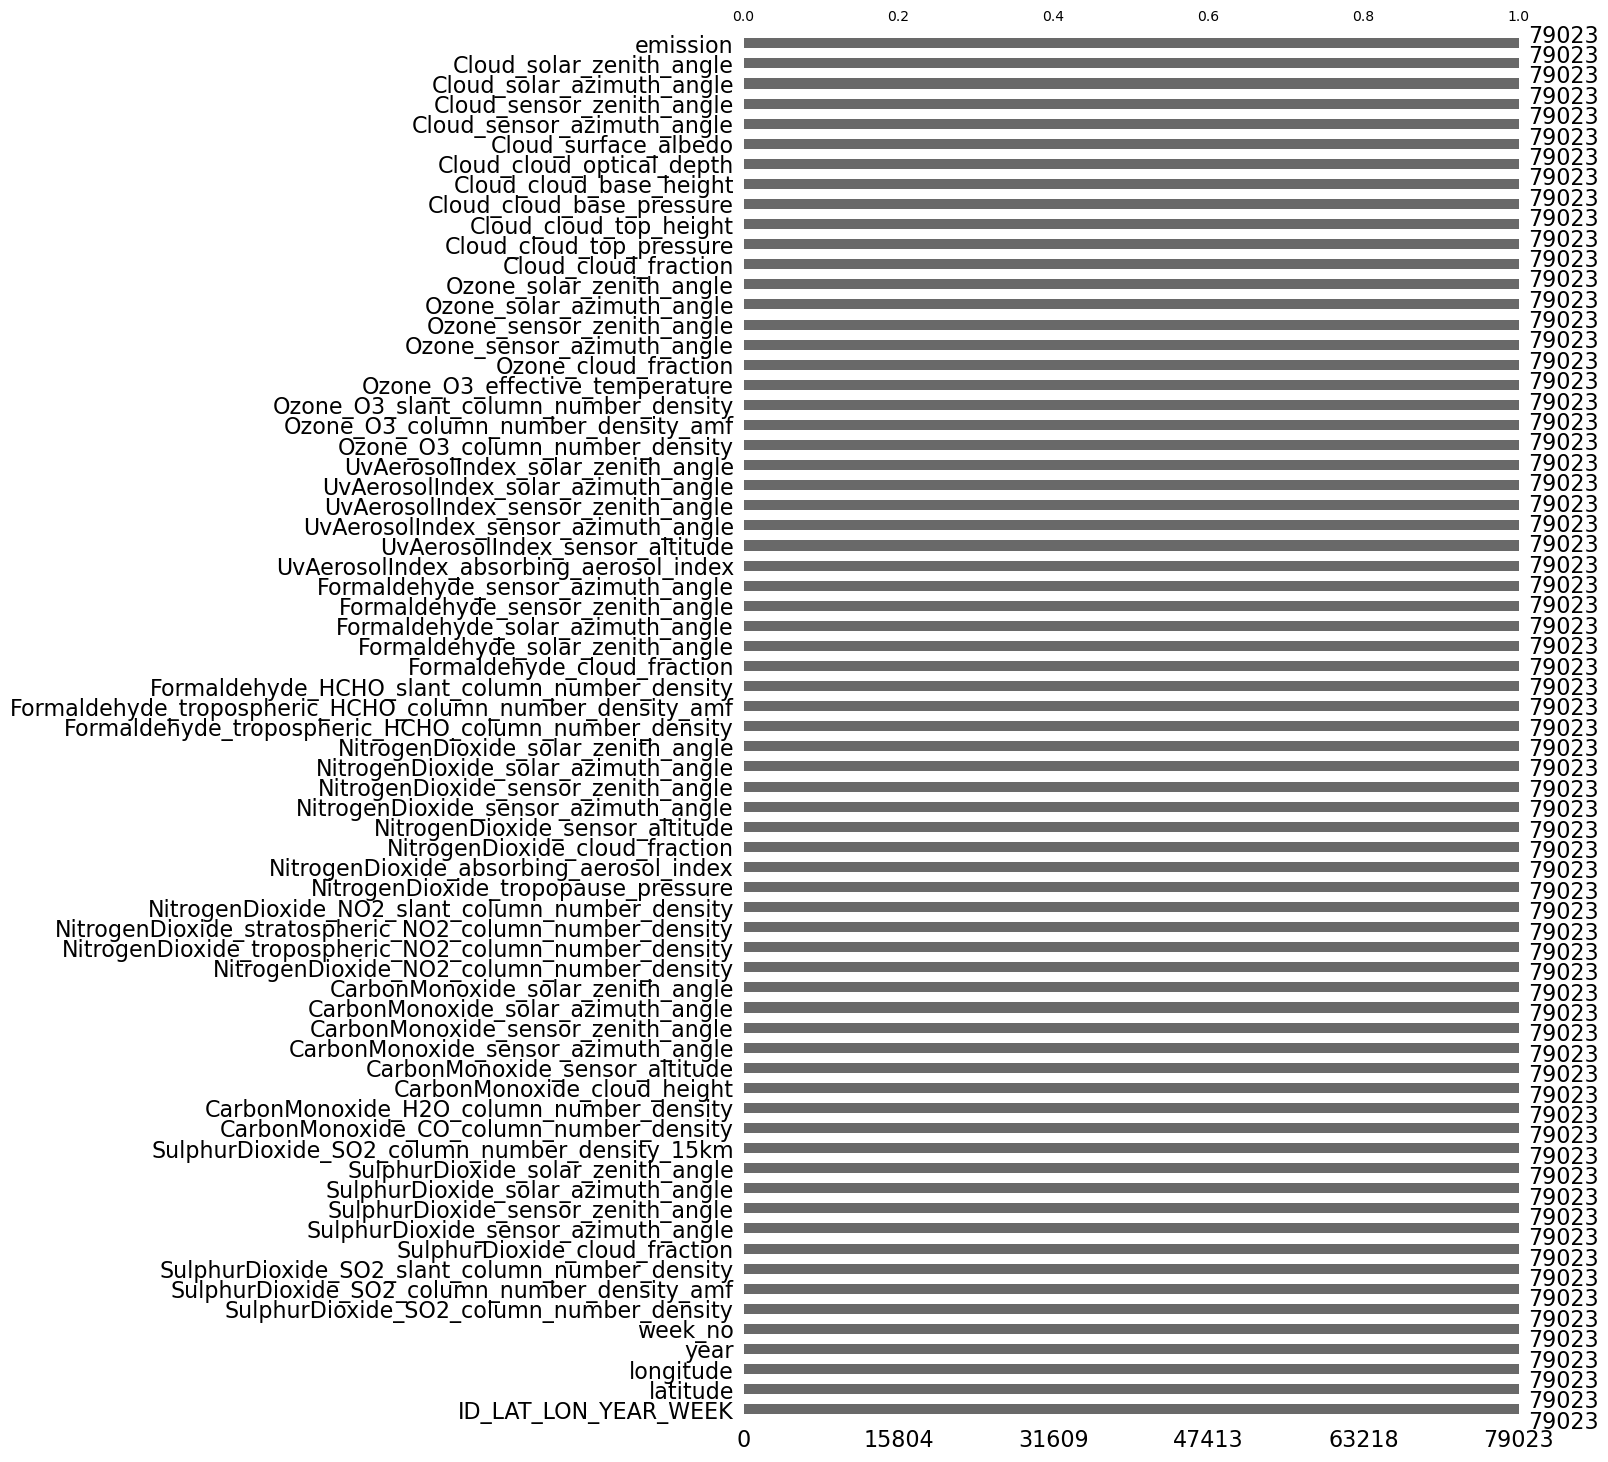

In [31]:
# remove 'UvAerosolLayerHeight_aerosol_height',
#        'UvAerosolLayerHeight_aerosol_pressure',
#        'UvAerosolLayerHeight_aerosol_optical_depth',
#        'UvAerosolLayerHeight_sensor_zenith_angle',
#        'UvAerosolLayerHeight_sensor_azimuth_angle',
#        'UvAerosolLayerHeight_solar_azimuth_angle',
#        'UvAerosolLayerHeight_solar_zenith_angle'
# col 



df_train1 = df_train.drop(['UvAerosolLayerHeight_aerosol_height',
         'UvAerosolLayerHeight_aerosol_pressure',
         'UvAerosolLayerHeight_aerosol_optical_depth',
         'UvAerosolLayerHeight_sensor_zenith_angle',
         'UvAerosolLayerHeight_sensor_azimuth_angle',
         'UvAerosolLayerHeight_solar_azimuth_angle',
         'UvAerosolLayerHeight_solar_zenith_angle'], axis=1)

less_missing_cols = ['Cloud_cloud_fraction','Cloud_cloud_top_pressure', 'Cloud_cloud_top_height',
       'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height',
       'Cloud_cloud_optical_depth', 'Cloud_surface_albedo',
       'Cloud_sensor_azimuth_angle', 'Cloud_sensor_zenith_angle',
       'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle',
       'Ozone_O3_column_number_density',
       'Ozone_O3_column_number_density_amf',
       'Ozone_O3_slant_column_number_density',
       'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction',
       'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'UvAerosolIndex_absorbing_aerosol_index',
       'UvAerosolIndex_sensor_altitude', 'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle']
       
more_missing_cols = ['Formaldehyde_tropospheric_HCHO_column_number_density',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'Formaldehyde_HCHO_slant_column_number_density',
       'Formaldehyde_cloud_fraction', 'Formaldehyde_solar_zenith_angle',
       'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle',
       'Formaldehyde_sensor_azimuth_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'NitrogenDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km']

# treat less missing cols

df_train_less_missing = df_train1[less_missing_cols]

print(df_train_less_missing.isnull().sum())

df_train_less_missing = df_train_less_missing.fillna(df_train_less_missing.mean())

df_train_less_missing.isnull().sum()

print(df_train_less_missing.shape)

# put df_train_less_missing in df_train1

df_train1[less_missing_cols] = df_train_less_missing

# treat more missing cols

df_train_more_missing = df_train1[more_missing_cols]

print(df_train_more_missing.isnull().sum())

df_train_more_missing = df_train_more_missing.fillna(df_train_more_missing.mean())

df_train_more_missing.isnull().sum()

print(df_train_more_missing.shape)

# put df_train_more_missing in df_train1

df_train1[more_missing_cols] = df_train_more_missing

# other way to handle more missing cols without dropping col and rows is to use imputer from sklearn

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')



# check missing values again

msno.bar(df_train1, figsize=(10, 18))


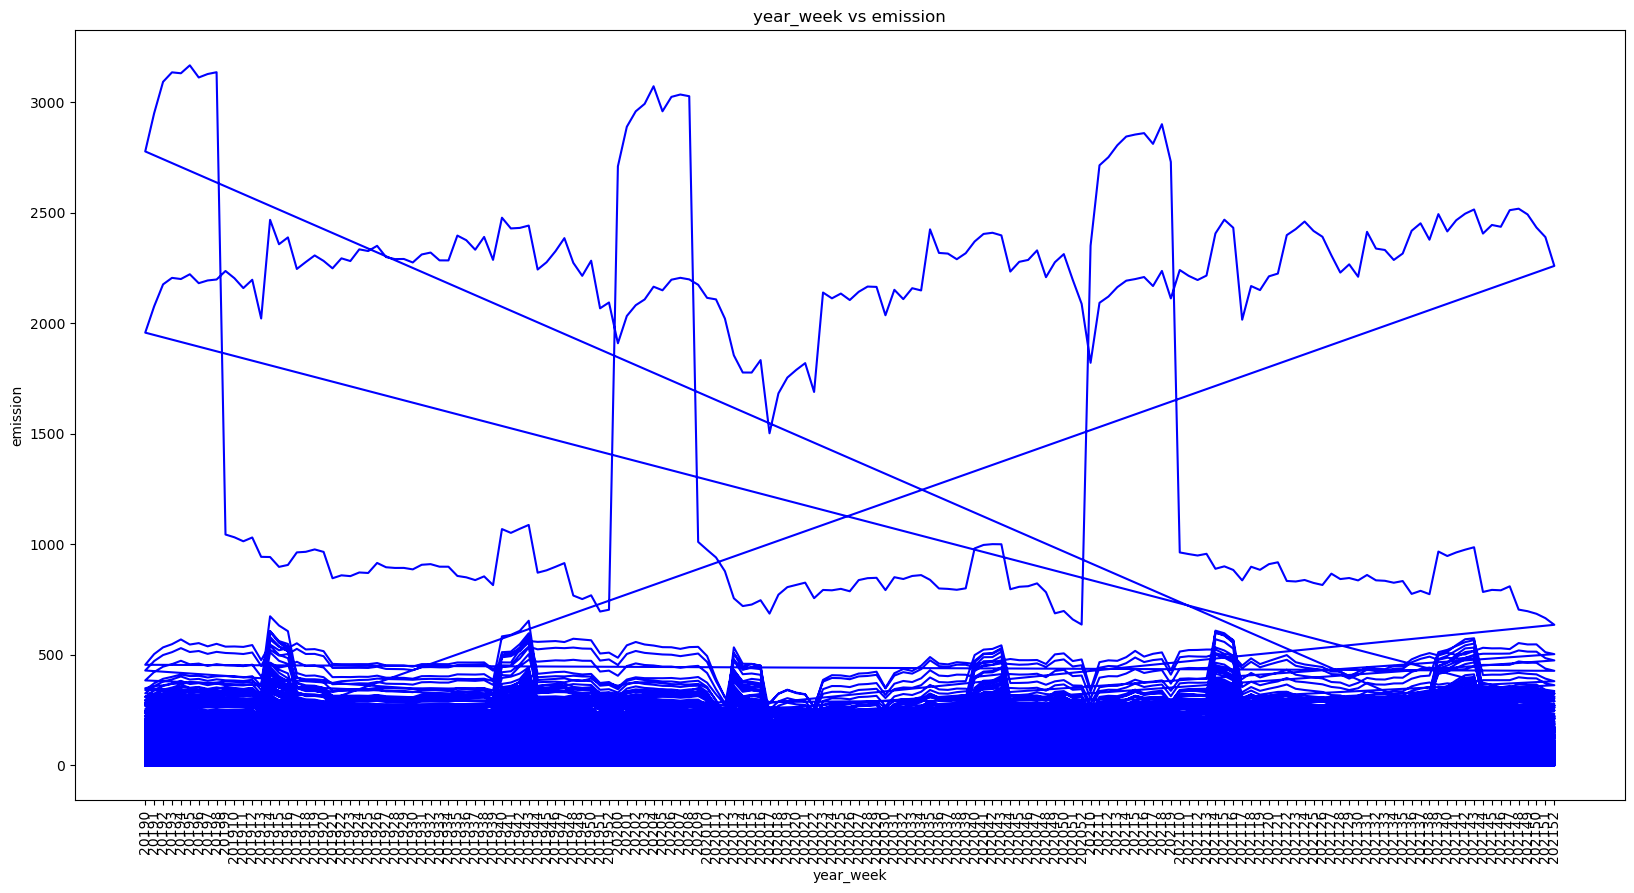

In [36]:

# combine year and week number to create a new column

df_train1['year_week'] = df_train1['year'].astype(str) + df_train1['week_no'].astype(str)

# plot year_week vs emission

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(df_train1['year_week'], df_train1['emission'], color='blue')
plt.xlabel('year_week')
plt.ylabel('emission')
plt.title('year_week vs emission')
plt.xticks(rotation=90)
plt.show()
